In [1]:
# Flag para configurar se é desejável plotar ou não gráficos e tabelas com o matplotlib.

plot = 0

# Importação de bibliotecas

In [404]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import *
from sklearn.preprocessing import LabelEncoder,StandardScaler
import csv
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRegressor
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix
from itertools import combinations
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import time
from imblearn.over_sampling import SMOTE


# Pré-Processamento

## Leitura de dados

In [275]:

file_path = 'Data/campeonatos_futebol_atualizacao.csv'

ace_df = pd.read_csv(file_path, encoding='latin-1')

In [276]:
ace_df.describe()

,Chutes a gol 1,Chutes a gol 2,Impedimentos 1,Impedimentos 2,Escanteios 1,Escanteios 2,Chutes fora 1,Chutes fora 2,Faltas 1,Faltas 2,...,Tratamentos 1,Tratamentos 2,SubstituiÃ§Ãµes 1,SubstituiÃ§Ãµes 2,Tiros-livres 1,Tiros-livres 2,Defesas difÃ­ceis 1,Defesas difÃ­ceis 2,Posse 1(%),Posse 2(%)
count,26204.000000,26204.000000,24942.000000,24942.000000,25388.000000,25388.000000,25392.000000,25392.000000,25394.000000,25394.000000,...,5019.000000,5019.000000,9420.000000,9420.000000,6246.000000,6246.000000,6196.000000,6196.000000,25366.000000,25366.000000
mean,4.767287,3.854526,2.139844,1.968527,5.548409,4.459824,6.034302,4.956758,12.694495,12.946444,...,1.995617,2.134489,3.000318,3.001168,14.156260,14.245757,2.676888,3.206908,51.315659,48.508279
std,2.797705,2.444182,1.754924,1.681298,2.975521,2.620973,3.224260,5.451316,4.337402,4.608542,...,2.258323,2.296141,1.020285,1.033004,4.432963,4.335781,1.842689,2.078474,9.834217,9.808893
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,1.000000,1.000000,3.000000,3.000000,4.000000,3.000000,10.000000,10.000000,...,0.000000,0.000000,3.000000,3.000000,11.000000,11.000000,1.000000,2.000000,45.000000,42.000000
50%,4.000000,4.000000,2.000000,2.000000,5.000000,4.000000,6.000000,5.000000,12.000000,13.000000,...,1.000000,2.000000,3.000000,3.000000,14.000000,14.000000,2.000000,3.000000,52.000000,48.000000
75%,6.000000,5.000000,3.000000,3.000000,7.000000,6.000000,8.000000,7.000000,15.000000,16.000000,...,3.000000,3.000000,3.000000,3.000000,17.000000,17.000000,4.000000,4.000000,58.000000,55.000000
max,90.000000,80.000000,23.000000,15.000000,22.000000,21.000000,23.000000,748.000000,46.000000,180.000000,...,17.000000,16.000000,6.000000,6.000000,36.000000,33.000000,11.000000,17.000000,100.000000,100.000000


In [277]:
ace_df.head()

,Chutes a gol 1,Chutes a gol 2,Impedimentos 1,Impedimentos 2,Escanteios 1,Escanteios 2,Chutes fora 1,Chutes fora 2,Faltas 1,Faltas 2,...,Tiros-livres 1,Tiros-livres 2,Defesas difÃ­ceis 1,Defesas difÃ­ceis 2,Posse 1(%),Posse 2(%),Time 1,Time 2,Position 1,Position 2
0,8.0,0.0,6.0,3.0,7.0,1.0,6.0,1.0,8.0,14.0,...,NaN,NaN,NaN,NaN,77.0,23.0,Glasgow Rangers,Livingston,4-3-3,4-3-3
1,0.0,2.0,0.0,2.0,0.0,4.0,3.0,4.0,19.0,14.0,...,NaN,NaN,NaN,NaN,44.0,56.0,Ross County,St.Johnstone,3-5-2,3-5-2
2,4.0,5.0,1.0,5.0,8.0,11.0,2.0,5.0,13.0,14.0,...,NaN,NaN,NaN,NaN,47.0,53.0,Dundee FC,St. Mirren,4-3-3,3-4-1-2
3,4.0,7.0,8.0,1.0,6.0,5.0,4.0,7.0,4.0,11.0,...,NaN,NaN,NaN,NaN,27.0,73.0,Hearts,Celtic,3-4-3,4-2-3-1
4,3.0,1.0,1.0,3.0,5.0,4.0,2.0,2.0,12.0,17.0,...,NaN,NaN,NaN,NaN,58.0,42.0,Aberdeen,Dundee U.,4-4-2,3-5-1-1


## Criação de colunas adicionais

Criação de uma variável juntando a informação de quem joga em casa e quem é visitante

In [278]:
# Criação de uma variável juntando a informação de quem joga em casa e quem é visitante.
ace_df['Time 1 x Time 2'] = ace_df['Time 1'].values + ' x '+ace_df['Time 2'].values
# ace_df.drop(['Time 1', 'Time 2'], inplace=  True, axis =1)

Criação de uma variável que indica se o time 1 venceu ou não venceu (perdeu ou empatou). Essa será a variável objetiva, utilizada por transformar o desafio em um problema de classificação binária.

In [279]:
ace_df['Resultado Time 1'] = ace_df.apply(lambda row: '0' if row['Gols 1'] > row['Gols 2'] else '1', axis=1)

## Separação de dados para teste

Antes que haja transformações nos dados, parte do dataset é separado para um teste sem viés.

In [280]:
ace_df_teste = ace_df.sample(frac=0.05,random_state=1)
ace_df.drop(ace_df_teste.index, inplace=True)

## Lidar com Outliers

### Visualizar / Retirar manualmente 

Esse fluxo manual de visualização de variáveis e seus nulos permitiu inferir as variáveis que de fato possuiam valores irreais:
Anotação de outliers : Faltas 2 - 180 e outros; Chutes fora 2 748.0 e outros

In [281]:
analys_flag = 0

In [282]:
# Função com método de remoção 'automático' de outliers, por meio de informações estatísticas
def remove_outliers(df, filter_cols, lowq, supq):
    # Iterate over each numerical column
    for col in filter_cols:
        # Calculate the IQR
        Q1 = df[col].quantile(lowq)
        Q3 = df[col].quantile(supq)
        IQR = Q3 - Q1
        # Define the upper and lower bounds for outliers
        fac = 1.5
        lower_bound = Q1 - fac * IQR
        upper_bound = Q3 + fac * IQR
        print(f"{col} - Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
        # Remove outliers
        #print((df[col] <= upper_bound))
        df = df[( (df[col] <= upper_bound) | (df[col].isna()) ) ] # (df[col] >= lower_bound) & 
    print('\n')
    return df


In [283]:
numeric_columns = ace_df.select_dtypes(include='number').columns

if(analys_flag):
    for column in numeric_columns:
        print("Nome da coluna:", column)
        print("Mínimo:", ace_df[column].min())
        print("Mediana:", ace_df[column].median())
        print("Máximo:", ace_df[column].max())
        print('Razao:', ace_df[column].max()/ace_df[column].median())
        print('\n')



In [284]:
if(analys_flag):

    for column in numeric_columns:
        raz = ace_df[column].max()/ace_df[column].median()
        if (raz > 8):
            print(column)
            print(ace_df[column].max())
            print(ace_df[column].median())
            print('Razao:', ace_df[column].max()/ace_df[column].median())
            print('\n')

In [285]:
# Anotação de outliers : Faltas 2 - ~180 ; Chutes fora 2 748.0 ; Cruzamentos 1/2 ?? : 66, 63 ; 
# Chutes a gol 2 ; Chutes a gol 1 ; Cruzamentos 1 ; cruzamentos 2

In [286]:
if(analys_flag):

    # Calcular os quantis
    # var1, var2, var

    quantil_values = [0.95, 0.99 , 0.999, 0.9998,0.9999]
    quantiles_faltas2 = ace_df['Faltas 2'].quantile(quantil_values)
    quantiles_chutes_fora2 = ace_df['Chutes fora 2'].quantile(quantil_values)
    quantiles_cruzamentos2 = ace_df['Cruzamentos 2'].quantile(quantil_values)

    # Filtrar os valores superiores aos quantis
    selected1 = quantil_values[4]
    selected2 = quantil_values[3]
    selected3 =quantil_values[2]
    superiores_faltas2 = ace_df[ace_df['Faltas 2'] > quantiles_faltas2[selected1]]['Faltas 2']
    superiores_chutes_fora2 = ace_df[ace_df['Chutes fora 2'] > quantiles_chutes_fora2[selected2]]['Chutes fora 2']
    superiores_cruzamentos2 = ace_df[ace_df['Cruzamentos 2'] > quantiles_cruzamentos2[selected3]]['Cruzamentos 2']

    # Exibir os valores superiores aos quantis
    print("Valores superiores de quantil para Faltas 2:")
    print(superiores_faltas2)

    print("Valores superiores de quantil para Chutes fora 2:")
    print(superiores_chutes_fora2)

    print("Valores superiores de quantil para Cruzamentos 2:")
    print(superiores_cruzamentos2)


In [287]:
# Anotação de outliers : Faltas 2 - ~180 ; Chutes fora 2 748.0 ; Cruzamentos 1/2 ?? : 66, 63 ; 
# Chutes a gol 2 ; Chutes a gol 1 ; Cruzamentos 1 ; cruzamentos 2

### Filtragem automática por quantil / IQR

In [288]:
ace_df.columns

Index(['Chutes a gol 1', 'Chutes a gol 2', 'Impedimentos 1', 'Impedimentos 2',
       'Escanteios 1', 'Escanteios 2', 'Chutes fora 1', 'Chutes fora 2',
       'Faltas 1', 'Faltas 2', 'CartÃµes amarelos 1', 'CartÃµes amarelos 2',
       'CartÃµes vermelhos 1', 'CartÃµes vermelhos 2', 'Cruzamentos 1',
       'Cruzamentos 2', 'Laterais 1', 'Laterais 2', 'Chutes bloqueados 1',
       'Chutes bloqueados 2', 'Contra-ataques 1', 'Contra-ataques 2', 'Gols 1',
       'Gols 2', 'Tiro de meta 1', 'Tiro de meta 2', 'Tratamentos 1',
       'Tratamentos 2', 'SubstituiÃ§Ãµes 1', 'SubstituiÃ§Ãµes 2',
       'Tiros-livres 1', 'Tiros-livres 2', 'Defesas difÃ­ceis 1',
       'Defesas difÃ­ceis 2', 'Posse 1(%)', 'Posse 2(%)', 'Time 1', 'Time 2',
       'Position 1', 'Position 2', 'Time 1 x Time 2', 'Resultado Time 1'],
      dtype='object')

In [289]:

# filter_cols =  ['Faltas 2', 'Chutes fora 2' , 'Chutes a gol 1', 'Chutes a gol 2'] # numeric_columns # ['Faltas 2']# # ['Faltas 2', 'Chutes fora 2',]
# Apply the remove_outliers function to ace_df

ace_df_cleaned = remove_outliers(ace_df , ['Faltas 2', 'Chutes fora 2'], 0.0, 0.75)
ace_df_cleaned = remove_outliers(ace_df_cleaned , [ 'Chutes a gol 1', 'Chutes a gol 2'], 0.0, 0.75)


index_diff = ace_df.index.difference(ace_df_cleaned.index)

print('Diferença / linhas retiradas:', len(ace_df) - len(ace_df_cleaned))


Faltas 2 - Lower Bound: -24.0, Upper Bound: 40.0
Chutes fora 2 - Lower Bound: -10.5, Upper Bound: 17.5


Chutes a gol 1 - Lower Bound: -9.0, Upper Bound: 15.0
Chutes a gol 2 - Lower Bound: -7.5, Upper Bound: 12.5


Diferença / linhas retiradas: 146


In [290]:
print(f"DIferença de linhas: {len(ace_df)} - {len(ace_df_cleaned)} = {len(ace_df) - len(ace_df_cleaned)}")

DIferença de linhas: 26330 - 26184 = 146


In [291]:
ace_df_cleaned

,Chutes a gol 1,Chutes a gol 2,Impedimentos 1,Impedimentos 2,Escanteios 1,Escanteios 2,Chutes fora 1,Chutes fora 2,Faltas 1,Faltas 2,...,Defesas difÃ­ceis 1,Defesas difÃ­ceis 2,Posse 1(%),Posse 2(%),Time 1,Time 2,Position 1,Position 2,Time 1 x Time 2,Resultado Time 1
0,8.0,0.0,6.0,3.0,7.0,1.0,6.0,1.0,8.0,14.0,...,NaN,NaN,77.0,23.0,Glasgow Rangers,Livingston,4-3-3,4-3-3,Glasgow Rangers x Livingston,0
1,0.0,2.0,0.0,2.0,0.0,4.0,3.0,4.0,19.0,14.0,...,NaN,NaN,44.0,56.0,Ross County,St.Johnstone,3-5-2,3-5-2,Ross County x St.Johnstone,1
2,4.0,5.0,1.0,5.0,8.0,11.0,2.0,5.0,13.0,14.0,...,NaN,NaN,47.0,53.0,Dundee FC,St. Mirren,4-3-3,3-4-1-2,Dundee FC x St. Mirren,1
3,4.0,7.0,8.0,1.0,6.0,5.0,4.0,7.0,4.0,11.0,...,NaN,NaN,27.0,73.0,Hearts,Celtic,3-4-3,4-2-3-1,Hearts x Celtic,0
4,3.0,1.0,1.0,3.0,5.0,4.0,2.0,2.0,12.0,17.0,...,NaN,NaN,58.0,42.0,Aberdeen,Dundee U.,4-4-2,3-5-1-1,Aberdeen x Dundee U.,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27711,6.0,2.0,1.0,0.0,9.0,6.0,6.0,5.0,7.0,7.0,...,NaN,NaN,52.0,48.0,Aston Villa,Blackburn,4-4-2,4-5-1,Aston Villa x Blackburn,1
27712,6.0,0.0,4.0,3.0,4.0,2.0,8.0,2.0,11.0,9.0,...,NaN,NaN,52.0,48.0,Arsenal,Fulham,4-2-3-1,4-4-2,Arsenal x Fulham,0
27713,7.0,7.0,2.0,3.0,10.0,2.0,8.0,0.0,10.0,6.0,...,NaN,NaN,55.0,45.0,Manchester Utd,Stoke,4-4-2,4-4-2,Manchester Utd x Stoke,0
27714,6.0,6.0,1.0,2.0,4.0,3.0,4.0,6.0,5.0,3.0,...,NaN,NaN,45.0,55.0,West Ham,Manchester City,4-5-1,4-4-2,West Ham x Manchester City,1


## Lidar com valores nulos

Caso uma coluna tenha mais do que k % de linhas nulas, ela é desconsiderada. Foram realizadas tentativas de utilizar algumas dessas colunas, mas chegamos à conclusão que a introdução de uma quantidade muito alta de dados artificiais traz viés ao modelo e não agrega.

In [292]:
null_map = ace_df_cleaned.isna().sum()

In [293]:
threshold = 0.5 * len(ace_df_cleaned)
for col in numeric_columns:
    # print(f'nulos: {null_map[col]}  ; threshold : {threshold}' )
    if (null_map[col] < threshold):
        ace_df_cleaned[col] = ace_df_cleaned[col].fillna(ace_df_cleaned[col].median(numeric_only= True))

In [294]:
print(f'threshold : {threshold} ---> Mínimo de linhas não nulas que uma coluna deve ter para não ser excluída')

threshold : 13092.0 ---> Mínimo de linhas não nulas que uma coluna deve ter para não ser excluída


In [295]:
ace_df_cleaned.isna().sum()

Chutes a gol 1              0
Chutes a gol 2              0
Impedimentos 1              0
Impedimentos 2              0
Escanteios 1                0
Escanteios 2                0
Chutes fora 1               0
Chutes fora 2               0
Faltas 1                    0
Faltas 2                    0
CartÃµes amarelos 1         0
CartÃµes amarelos 2         0
CartÃµes vermelhos 1        0
CartÃµes vermelhos 2        0
Cruzamentos 1           17682
Cruzamentos 2           17682
Laterais 1                  0
Laterais 2                  0
Chutes bloqueados 1     17835
Chutes bloqueados 2     17835
Contra-ataques 1        20278
Contra-ataques 2        20278
Gols 1                      0
Gols 2                      0
Tiro de meta 1          14818
Tiro de meta 2          14818
Tratamentos 1           21454
Tratamentos 2           21454
SubstituiÃ§Ãµes 1       17296
SubstituiÃ§Ãµes 2       17296
Tiros-livres 1          20267
Tiros-livres 2          20267
Defesas difÃ­ceis 1     20314
Defesas di

## Codificação de variáveis não-numéricas

Variáveis não numéricas como as variáveis referentes aos times são codificadas. As variáveis de posição dos times adotam outra abordagem e por isso não são codificadas aqui. É utilizado um dicionário para armazenar os label_encoders associados à cada variável codificada.

In [296]:
select_df = ace_df_cleaned

In [297]:

# Crie uma cópia do dataframe ace_df
ace_df_encoded = select_df.copy()

# Instancie o LabelEncoder
label_encoder_dict = {}

# Itere sobre as colunas do dataframe
for column in ace_df_encoded.columns:
    # Verifique se a coluna é do tipo 'object'
    if (ace_df_encoded[column].dtype == 'object') and (column != 'Position 1')and (column != 'Position 2'):
        label_encoder_dict[column] = LabelEncoder()

        # Aplique a codificação usando o LabelEncoder
        ace_df_encoded[column] = label_encoder_dict[column].fit_transform(ace_df_encoded[column])

# Verifique o resultado
print(ace_df_encoded)

       Chutes a gol 1  Chutes a gol 2  Impedimentos 1  Impedimentos 2  \
0                 8.0             0.0             6.0             3.0   
1                 0.0             2.0             0.0             2.0   
2                 4.0             5.0             1.0             5.0   
3                 4.0             7.0             8.0             1.0   
4                 3.0             1.0             1.0             3.0   
...               ...             ...             ...             ...   
27711             6.0             2.0             1.0             0.0   
27712             6.0             0.0             4.0             3.0   
27713             7.0             7.0             2.0             3.0   
27714             6.0             6.0             1.0             2.0   
27715             4.0             2.0             2.0             2.0   

       Escanteios 1  Escanteios 2  Chutes fora 1  Chutes fora 2  Faltas 1  \
0               7.0           1.0            6

## Criação de colunas adicionais 2

Tentativa de criação de uma equivalencia entre a posição utilizada e o quão agressiva ela é ( quanto mais perto de 1, mais defensiva). Será usada mais a frente para criação de uma coluna de eficiencia de ataque do time.

In [298]:
formation_info = {
    '4-2-3-1': (0.87, 'Equilibrada, com 2 volantes; transições rápidas.'),
    '4-4-2': (0.90, 'Tradicional e sólida; foco no equilíbrio.'),
    '4-3-3': (0.78, 'Agressiva, com 3 atacantes abertos.'),
    '3-5-2': (0.85, 'Meio-campo forte, alas apoiam; defesa com 3 zagueiros.'),
    '4-4-1-1': (0.91, 'Defensiva, com apenas 1 atacante.'),
    '4-3-1-2': (0.88, 'Compacta e com meio centralizado.'),
    '3-4-3': (0.76, 'Bastante ofensiva, poucos defensores fixos.'),
    '4-1-4-1': (0.93, 'Muito segura, com um volante fixo.'),
    '3-4-2-1': (0.82, 'Ofensiva mas com cobertura no meio.'),
    '4-5-1': (0.95, 'Extremamente defensiva, 1 atacante isolado.'),
    '3-4-1-2': (0.84, 'Mais equilibrada, com liberdade no ataque.'),
    '4-1-2-2-1': (0.91, 'Meia ofensiva central + um volante, ainda cautelosa.'),
    '5-3-2': (0.97, 'Linha de 5 defensores, muito fechada.'),
    '4-1-2-1-2': (0.89, 'Meio centralizado com losango; moderadamente ofensiva.'),
    '4-2-2-2': (0.86, 'Meio espaçado, mas flexível.'),
    '4-3-2-1': (0.90, 'Bola no pé e compactação.'),
    '3-5-1-1': (0.89, 'Mais povoado no meio, 1 atacante.'),
    '5-4-1': (0.98, 'Extremamente defensiva.'),
    '4-1-2-3': (0.83, 'Bom equilíbrio, com 3 atacantes.'),
    '4-1-3-2': (0.82, 'Mais presença ofensiva, 2 atacantes.'),
    '3-1-4-2': (0.80, 'Bastante ofensiva com apoio de meio.'),
    '4-2-1-3': (0.79, 'Foco ofensivo com 3 à frente.'),
    '3-2-3-2': (0.78, 'Compacta e ofensiva.'),
    '5-2-3': (0.85, 'Defesa sólida, alas com liberdade.'),
    '5-3-1-1': (0.96, 'Muito defensiva, 1 atacante.'),
    '3-3-3-1': (0.81, 'Equilibrada, meio intenso.'),
    '3-3-2-2': (0.79, 'Bastante ofensiva.'),
    '3-1-3-1-2': (0.77, 'Bastante ofensiva e moderna.'),
    '3-2-4-1': (0.75, 'Muito ofensiva, 4 no meio avançado.')
}


In [299]:
ace_df_encoded['Position 1']

0          4-3-3
1          3-5-2
2          4-3-3
3          3-4-3
4          4-4-2
          ...   
27711      4-4-2
27712    4-2-3-1
27713      4-4-2
27714      4-5-1
27715      4-4-2
Name: Position 1, Length: 26184, dtype: object

Criação de uma coluna que estabelece um score de 0.7 à 1 para o quão defensiva é a posição.

In [300]:
# Criação de uma variável que classifica a posição dos jogadores quanto à agressividade. (quanto maior o número, mais defensivo)
ace_df_encoded['Position 1 Score'] = ace_df_encoded['Position 1'].map(lambda x: formation_info.get(x, (None,))[0])
ace_df_encoded['Position 2 Score'] = ace_df_encoded['Position 2'].map(lambda x: formation_info.get(x, (None,))[0])
ace_df_encoded['Position 1 Score'] = ace_df_encoded['Position 1 Score'].fillna(ace_df_encoded['Position 1 Score'].median())
ace_df_encoded['Position 2 Score'] = ace_df_encoded['Position 2 Score'].fillna(ace_df_encoded['Position 1 Score'].median())


Criação de uma métrica própria que visa estimar se uma equipe tem um bom aproveitamento de posse de bola, tendo em vista a posição dos jogadores. É utilizada uma média ponderada entre Chutes a gol e Escanteios para determinar uma métrica de agressividade para o ataque do time. Em seguida, times com uma posição mais ofensiva tem sua métrica penalizada, e, por fim é feito uma razão entre a agressividade e a posse de bola.


In [301]:
pesos_eficiencia = [2,2]
# ace_df_encoded['Defesas difÃ­ceis 2'] = ace_df_encoded['Defesas difÃ­ceis 2'].fillna(0)
# ace_df_encoded['Defesas difÃ­ceis 1'] = ace_df_encoded['Defesas difÃ­ceis 1'].fillna(0)

ace_df_encoded['Eficiencia de ataque 1'] = (
    # Calculo de uma métrica de ataque do time
    ((ace_df_encoded['Chutes a gol 1'] * pesos_eficiencia[0] +
     ace_df_encoded['Escanteios 1'] * pesos_eficiencia[1]
     ) / sum(pesos_eficiencia) ) 
     # Uma posição que prioriza ataque penaliza a métrica.
     * ace_df_encoded['Position 1 Score']
# Essa métrica de ataque é dividida pela média de posse de bola do time, considerando que um time eficiente no ataque 'aproveita' melhor sua posse de bola.
) / (ace_df_encoded['Posse 1(%)']  * 0.02 )
ace_df_encoded['Eficiencia de ataque 2'] = (
    # Calculo de uma métrica de ataque do time
    ((ace_df_encoded['Chutes a gol 2'] * pesos_eficiencia[0] +
     ace_df_encoded['Escanteios 2'] * pesos_eficiencia[1]
     ) / sum(pesos_eficiencia) ) 
     # Uma posição que prioriza ataque penaliza a métrica.
     * ace_df_encoded['Position 2 Score']
# Essa métrica de ataque é dividida pela média de posse de bola do time, considerando que um time eficiente no ataque 'aproveita' melhor sua posse de bola.
) / (ace_df_encoded['Posse 2(%)'] * 0.02)

ace_df_encoded['Eficiencia de ataque 1'] = ace_df_encoded['Eficiencia de ataque 1'].replace([np.inf, -np.inf, np.nan], ace_df_encoded['Eficiencia de ataque 1'].median())
ace_df_encoded['Eficiencia de ataque 2'] = ace_df_encoded['Eficiencia de ataque 2'].replace([np.inf, -np.inf, np.nan], ace_df_encoded['Eficiencia de ataque 1'].median())

Essa métrica foi uma tentativa de junção de variáveis que pudesse ser útil ao modelo. No entanto, não foi realmente proveitosa para predição da vitória do time 1.

## Visualização 

### Visualização de 2 variáveis

In [302]:
ace_df.columns

Index(['Chutes a gol 1', 'Chutes a gol 2', 'Impedimentos 1', 'Impedimentos 2',
       'Escanteios 1', 'Escanteios 2', 'Chutes fora 1', 'Chutes fora 2',
       'Faltas 1', 'Faltas 2', 'CartÃµes amarelos 1', 'CartÃµes amarelos 2',
       'CartÃµes vermelhos 1', 'CartÃµes vermelhos 2', 'Cruzamentos 1',
       'Cruzamentos 2', 'Laterais 1', 'Laterais 2', 'Chutes bloqueados 1',
       'Chutes bloqueados 2', 'Contra-ataques 1', 'Contra-ataques 2', 'Gols 1',
       'Gols 2', 'Tiro de meta 1', 'Tiro de meta 2', 'Tratamentos 1',
       'Tratamentos 2', 'SubstituiÃ§Ãµes 1', 'SubstituiÃ§Ãµes 2',
       'Tiros-livres 1', 'Tiros-livres 2', 'Defesas difÃ­ceis 1',
       'Defesas difÃ­ceis 2', 'Posse 1(%)', 'Posse 2(%)', 'Time 1', 'Time 2',
       'Position 1', 'Position 2', 'Time 1 x Time 2', 'Resultado Time 1'],
      dtype='object')

In [303]:
if(plot):
    # Visualização de var1 x var2
    plt.scatter(ace_df['Laterais 2'], ace_df['SubstituiÃ§Ãµes 2'])
    plt.xlabel('Impedimentos 1')
    plt.ylabel('Chutes a gol 1')
    plt.title('Nuvem de pontos - Impedimentos 1 x Chutes a gol 1')
    plt.show()

### Correlação Linear entre variáveis

In [304]:
if (plot):
    corr = ace_df_encoded.corr(numeric_only=True)

    plt.figure(figsize=(36, 8))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title("Correlation Matrix")
    plt.show()


### Visualização de densidade por classe

In [305]:
if (plot):
    import math
    hueVar = 'Resultado Time 1'
    dataset = ace_df_encoded

    # Filtra apenas colunas numéricas, exceto a hueVar
    numeric_cols = dataset.select_dtypes(include='number').columns
    numeric_cols = [col for col in numeric_cols if col != hueVar]

    cols_per_row = 3
    n = len(numeric_cols)
    rows = math.ceil(n / cols_per_row)

    fig, axes = plt.subplots(rows, cols_per_row, figsize=(5*cols_per_row, 4*rows))
    axes = axes.flatten()

    for i, col in enumerate(numeric_cols):
        sns.kdeplot(data=dataset, x=col, hue=hueVar, fill=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {col} by {hueVar}')

    # Remove gráficos vazios se o número de colunas não for múltiplo de 3
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


## Seleção de variáveis

É possível visualizar quantos nulos cada variável tem

In [306]:
null_columns = ace_df_encoded.columns[ace_df_encoded.isnull().any()].tolist()

ace_df_encoded.isna().sum()

Chutes a gol 1                0
Chutes a gol 2                0
Impedimentos 1                0
Impedimentos 2                0
Escanteios 1                  0
Escanteios 2                  0
Chutes fora 1                 0
Chutes fora 2                 0
Faltas 1                      0
Faltas 2                      0
CartÃµes amarelos 1           0
CartÃµes amarelos 2           0
CartÃµes vermelhos 1          0
CartÃµes vermelhos 2          0
Cruzamentos 1             17682
Cruzamentos 2             17682
Laterais 1                    0
Laterais 2                    0
Chutes bloqueados 1       17835
Chutes bloqueados 2       17835
Contra-ataques 1          20278
Contra-ataques 2          20278
Gols 1                        0
Gols 2                        0
Tiro de meta 1            14818
Tiro de meta 2            14818
Tratamentos 1             21454
Tratamentos 2             21454
SubstituiÃ§Ãµes 1         17296
SubstituiÃ§Ãµes 2         17296
Tiros-livres 1            20267
Tiros-li

O seguinte código comentado é uma relação de conjuntos de variáveis que foram testados no modelo, seja manualmente ou por indicação do RFE (rotina de seleção de 'n' atributos).

O conjunto 'selected_variables6' representa uma tentativa de utilizar as variáveis de defesas difíceis mesmo essas tendo altos números de valores nulos. 
Nessa tentativa, os nulos foram substituídos por 0, e foi obtido um score de 0.738 no CV com 10 folds, mas preferimos exclui-lás mesmo assim, pois o treinamento com dados artificiais poderia deixar o modelo míope. Além disso, o teste utilizando dados inalterados mostrou que esse modelo não diferia muito do modelo final

In [307]:
# # selected_variables = ['Chutes a gol 1', 'Chutes a gol 2', 'Escanteios 1', 'Faltas 1', 'Faltas 2', 'Laterais 1', 'Posse 1(%)', 'Time 1', 'Time 2', 'Position 1'] + ['Gols 1', 'Gols 2', 'Resultado Time 1']
# selected_variables = ['Chutes a gol 1', 'Escanteios 1', 'CartÃµes amarelos 1',
#        'CartÃµes vermelhos 2', 'Cruzamentos 1', 'Laterais 1',
#        'Contra-ataques 2', 'SubstituiÃ§Ãµes 1', 'SubstituiÃ§Ãµes 2',
#        'Defesas difÃ­ceis 2'] + ['Gols 1', 'Gols 2', 'Resultado Time 1']


# selected_variables2 = ['Chutes a gol 1', 'Chutes a gol 2', 'Escanteios 1', 'Escanteios 2',
#        'Chutes fora 1', 'Chutes fora 2', 'CartÃµes amarelos 1', 'Laterais 1',
#        'Time 1', 'Time 2']
# selected_variables3 = ['Chutes a gol 1', 'Chutes a gol 2', 'Escanteios 1', 'Escanteios 2',
#        'Time 1', 'Time 2']
# selected_variables3_2 = ['Chutes a gol 1', 'Chutes a gol 2', 'Escanteios 1', 'Escanteios 2',
#        'Time 1 x Time 2']

# selected_variables3_3 = ['Chutes a gol 1', 'Chutes a gol 2', 'Escanteios 1', 'Escanteios 2',
#        'Time 1 x Time 2', 'Eficiencia de ataque 1', 'Eficiencia de ataque 2']
# selected_variables3_4 = ['Chutes a gol 1', 'Chutes a gol 2',
#        'Time 1 x Time 2', 'Eficiencia de ataque 1', 'Eficiencia de ataque 2']


# selected_variables4 = ['Chutes a gol 1', 'Chutes a gol 2', 'Impedimentos 1', 'Escanteios 1',
#        'Escanteios 2', 'Chutes fora 1', 'Chutes fora 2', 'CartÃµes amarelos 1',
#        'CartÃµes amarelos 2', 'Laterais 1', 'Laterais 2', 'Time 1', 'Time 2',
#        'Position 1', 'Position 2']


# selected_variables5 = ['Chutes a gol 1', 'Chutes a gol 2', 'Escanteios 1', 'Posse 2(%)',
#        'Eficiencia de ataque 1', 'Eficiencia de ataque 2'] # RFE Pós inserção de eficiência de ataque.


# selected_variables6 = ['Chutes a gol 1', 'Chutes a gol 2', 'Escanteios 1', 'Escanteios 2',
#        'Chutes fora 1', 'CartÃµes amarelos 1', 'CartÃµes vermelhos 1',
#        'CartÃµes vermelhos 2', 'Defesas difÃ­ceis 1', 'Defesas difÃ­ceis 2'] 
#
# Após benchmark de RFE com 1-> 43 variáveis selecionadas ; 

O último conjunto selected_variables7 foi obtido pelo benchmark de 1 até 43 variáveis executando o algorítimo RFE. Isso foi feito utilizando um dataset com colunas com no mínimo 50 % de dados não nulos, com variáveis não numéricas categorizadas, e com um tratamento de outliers mínimo ( foi determinado manualmente que poucas colunas de fato possuiam valores discrepantes da realidade)

In [374]:

selected_variables7 = ['Chutes a gol 1', 'Chutes a gol 2', 'Escanteios 1', 'Escanteios 2',
       'Chutes fora 1', 'CartÃµes amarelos 1', 'CartÃµes vermelhos 1',
       'CartÃµes vermelhos 2', 'Laterais 1', 'Time 1'] # Após benchmark de RFE com 1-> 43 variáveis selecionadas, 

ace_df_encoded_cut = ace_df_encoded.drop(null_columns,axis = 1) #[selected_variables]

selected_var = selected_variables7

ace_df_encoded_cut = ace_df_encoded_cut[selected_var  + ['Gols 1', 'Gols 2', 'Resultado Time 1']]

#ace_df_encoded_cut = ace_df_encoded

In [375]:
# Plot de duplas de variáveis preditoras, com a variável alvo colorida de acordo com o Label.
if (plot):
    # Gera os pares de variáveis
    pairs = list(combinations(selected_var, 2))

    # Define o número de colunas e calcula o número de linhas necessárias
    n_cols = 3
    n_rows = math.ceil(len(pairs) / n_cols)

    # Cria o grid de subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 5 * n_rows))
    axes = axes.flatten()

    # Plota cada par no grid
    for i, (var1, var2) in enumerate(pairs):
        sns.scatterplot(
            data=ace_df_encoded,
            x=var1,
            y=var2,
            hue='Resultado Time 1',
            ax=axes[i],
            alpha=0.7
        )
        axes[i].set_title(f'{var1} vs {var2}')

    # Remove subplots vazios (caso o número de pares < n_rows * n_cols)
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


## Rebalanceamento de classes

Foram testadas as estratégias de oversampling e downsampling, tal que a primeira se mostrou uma melhor opção para balancear as classes e gerar uma classificação mais igualitária durante teste do modelo (Número de acertos de vitórias e não vitórias similar, e número de falso negativo e falsos positivos similares).

In [398]:
oversample = 0

In [399]:
ace_df_encoded_cut.groupby('Resultado Time 1').size()

Resultado Time 1
0    11809
1    14375
dtype: int64

### Downsampling

In [400]:
# if (not oversample ):
#     count_per_class = ace_df_encoded_cut.groupby('Resultado Time 1').size()

#     samples_threshold = min(ace_df_encoded_cut.groupby('Resultado Time 1').size())

#     for mat, count in count_per_class.items():
#         while count > samples_threshold:
#             # Pega índices das linhas no grupo 'mat' até atingir o limite
#             exceding_samples = ace_df_encoded_cut[ace_df_encoded_cut['Resultado Time 1'] == mat].sample(n=count - samples_threshold).index

#             # Faça o drop das linhas excedentes
#             ace_df_encoded_cut = ace_df_encoded_cut.drop(exceding_samples)

#             # Atualize a contagem para o grupo 'genre'
#             count = len(ace_df_encoded_cut[ace_df_encoded_cut['Resultado Time 1'] == mat])

### Resultado


In [405]:
ace_df_encoded_cut.groupby('Resultado Time 1').size()

Resultado Time 1
0    11809
1    14375
dtype: int64

# Modelo de predição

## Treinamento e teste, com divisão do dataSet

### Seleção e treinamento

In [402]:
ace_df_encoded_cut.columns

Index(['Chutes a gol 1', 'Chutes a gol 2', 'Escanteios 1', 'Escanteios 2',
       'Chutes fora 1', 'CartÃµes amarelos 1', 'CartÃµes vermelhos 1',
       'CartÃµes vermelhos 2', 'Laterais 1', 'Time 1', 'Gols 1', 'Gols 2',
       'Resultado Time 1'],
      dtype='object')

In [406]:

# Split the data into training and testing sets
# X = ace_df_encoded.drop(['Resultado Time 1','Gols 1', 'Gols 2'] + , axis=1)

target_var1 = ['Gols 1']
target_var2 = ['Gols 2']
target_var3 = ['Resultado Time 1']

X = ace_df_encoded_cut.drop(target_var1+target_var2+target_var3, axis=1)
y = ace_df_encoded_cut[target_var3]

X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.15, random_state=42)


# Oversample não utilizado no modelo final
if (oversample):
    X_blc, y_blc = SMOTE().fit_resample(X_train, y_train)



Após testes e benchmarks, o classificador XGBoosting com hiperparametros definidos foi utilizado como modelo para resolver o problema, por ser eficiente e ter uma acurácia boa em relação aos outros testados.

In [407]:
rf_classifier_model = RandomForestClassifier(n_estimators=100, min_samples_split=10, random_state=1, class_weight="balanced")
# xgb_reg_model = XGBRegressor()
# extra_trees_model = ExtraTreesClassifier(n_estimators = 50, min_samples_split= 2,min_samples_leaf= 2, max_features ='log2', max_depth= 20, bootstrap = False) # n_estimators = 700, min_samples_split= 2,min_samples_leaf= 2, max_features ='log2', max_depth= 20, bootstrap = False

start = time.time()

xgb_classifier_model = XGBClassifier(subsample=1.0, reg_lambda=0.1, reg_alpha=0, n_estimators=50, max_depth=3, learning_rate=0.45, gamma=1, colsample_bytree=0.8)

use_model = xgb_classifier_model

if (oversample):
    use_model.fit(X_blc, y_blc)
else:
    use_model.fit(X_train, y_train)

end = time.time()



In [408]:
print(f'Tempo para criação e treinamento do modelo: {end - start}')

Tempo para criação e treinamento do modelo: 0.06031656265258789


### Cross Validation

In [409]:
# Evaluate the model using cross-validation
scores = cross_validate(use_model, X, y, cv=10, scoring=['accuracy', 'precision', 'recall', 'roc_auc'])
mean_accuracy = scores['test_accuracy'].mean()
mean_precision =scores['test_precision'].mean()
mean_recall = scores['test_recall'].mean()
mean_roc_auc = scores['test_roc_auc'].mean()

print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall: ", mean_recall)
print("Mean Roc_auc: ", mean_roc_auc)



Mean Accuracy: 0.704934163606086
Mean Precision: 0.7161603703734825
Mean Recall:  0.7680058033126114
Mean Roc_auc:  0.7742077379096571


XGBoosting Metrics:

-Mean Accuracy: 0.6979004899329027
-Mean Precision: 0.6966075371102072
-Mean Recall:  0.7042986409104608
-Mean Roc_auc:  0.7735272886616539

Extra Trees Metrics:

-Mean Accuracy: 0.6966305233111733
-Mean Precision: 0.6946104655735488
-Mean Recall:  0.70497581767821
-Mean Roc_auc:  0.7708904464939677

Random Forest Metrics:

Mean Accuracy: 0.6881201402554422
Mean Precision: 0.6911234101588581
Mean Recall:  0.6813495457741932
Mean Roc_auc:  0.7510383857879593


In [410]:
print(f'Acuracias ao longo dos folds:\n', scores['test_accuracy'])

Acuracias ao longo dos folds:
 [0.6792669  0.69377625 0.71859488 0.73195876 0.67265088 0.69518717
 0.68220015 0.73911383 0.74331551 0.69327731]


### Predição de validação

In [411]:
y_pred = use_model.predict(X_validate)

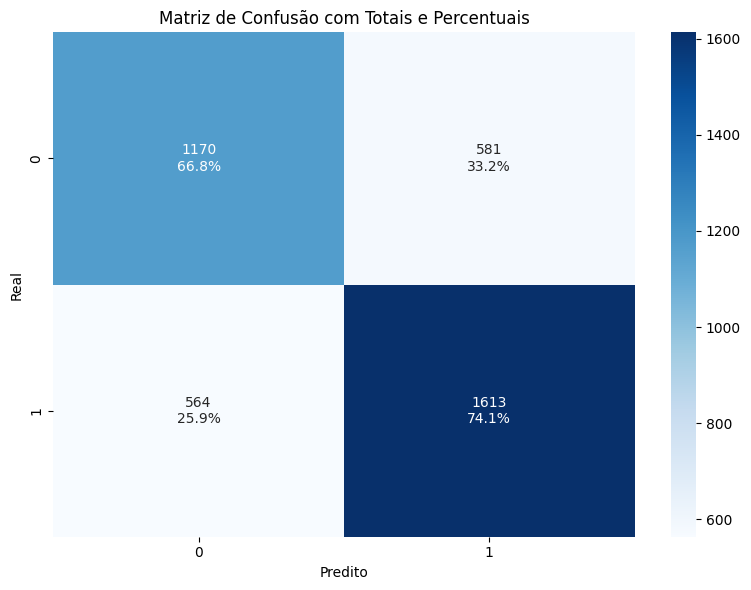

In [412]:
# Garante que ambos os arrays sejam 1D
labels = np.unique(np.concatenate([np.ravel(y_validate), np.ravel(y_pred)]))

# Matriz de confusão
cm = confusion_matrix(y_validate, y_pred, labels=labels)
cm_percent = cm.astype('float') / cm.sum(axis=1, keepdims=True) * 100

# DataFrames para visualização
cm_df = pd.DataFrame(cm, index=labels, columns=labels)
cm_percent_df = pd.DataFrame(cm_percent, index=labels, columns=labels)

# Anotações combinadas
annot = cm_df.astype(str) + "\n" + cm_percent_df.round(1).astype(str) + "%"

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=annot, fmt='', cmap='Blues', xticklabels=labels, yticklabels=labels)

plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão com Totais e Percentuais')
plt.tight_layout()
plt.show()


In [413]:
score = accuracy_score(y_validate, y_pred)
score

0.7085030549898167

### Predição do dataSet de teste inalterado usando o modelo retreinado


In [421]:
ace_df_teste

,Chutes a gol 1,Chutes a gol 2,Impedimentos 1,Impedimentos 2,Escanteios 1,Escanteios 2,Chutes fora 1,Chutes fora 2,Faltas 1,Faltas 2,...,Posse 1(%),Posse 2(%),Time 1,Time 2,Position 1,Position 2,Time 1 x Time 2,Resultado Time 1,Position 1 Score,Position 2 Score
26289,2.0,4.0,3.0,2.0,6.0,7.0,12.0,4.0,9.0,16.0,...,54.0,46.0,266,22,4-4-2,4-4-2,6184,1,0.90,0.90
6027,3.0,3.0,0.0,4.0,8.0,5.0,4.0,0.0,18.0,13.0,...,46.0,54.0,233,138,3-4-3,3-4-1-2,5419,1,0.76,0.84
8743,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,236,72,4-5-1,4-4-2,5480,0,0.95,0.90
17667,7.0,2.0,2.0,1.0,5.0,2.0,8.0,9.0,14.0,10.0,...,60.0,40.0,159,50,4-3-3,4-4-2,7344,1,0.78,0.90
6445,7.0,5.0,1.0,4.0,12.0,3.0,8.0,6.0,17.0,11.0,...,51.0,49.0,62,277,4-3-1-2,3-5-2,1421,1,0.88,0.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25616,6.0,5.0,4.0,4.0,10.0,6.0,5.0,4.0,5.0,9.0,...,47.0,53.0,297,178,4-2-3-1,4-2-3-1,6954,1,0.87,0.87
17496,1.0,2.0,1.0,0.0,5.0,5.0,10.0,5.0,7.0,7.0,...,55.0,45.0,28,238,5-4-1,4-2-2-2,653,1,0.98,0.86
4195,5.0,7.0,3.0,5.0,10.0,5.0,7.0,8.0,10.0,10.0,...,52.0,48.0,261,2,4-3-3,4-4-2,6080,1,0.78,0.90
5745,6.0,6.0,0.0,1.0,4.0,11.0,2.0,6.0,7.0,20.0,...,37.0,63.0,160,233,4-3-1-2,4-2-3-1,3608,1,0.88,0.87


In [422]:
for col in ace_df_teste.columns:
    if (ace_df_teste[col].dtype == 'object') and (col != 'Position 1') and (col != 'Position 2'):
        #print(col)
        le = label_encoder_dict[col]
        unseen = set(ace_df_teste[col].unique()) - set(le.classes_)
        if unseen:
            le.classes_ = np.append(le.classes_, list(unseen))
        ace_df_teste[col] = le.transform(ace_df_teste[col])

ace_df_teste['Position 1 Score'] = ace_df_teste['Position 1'].map(lambda x: formation_info.get(x, (None,))[0])
ace_df_teste['Position 2 Score'] = ace_df_teste['Position 2'].map(lambda x: formation_info.get(x, (None,))[0])


In [423]:
X_test = ace_df_teste.drop(target_var1+target_var2+target_var3, axis=1)[selected_var]
y_test = ace_df_teste[target_var3[0]].astype(int)


In [433]:
X = ace_df_encoded_cut.drop(target_var1+target_var2+target_var3, axis=1)
y = ace_df_encoded_cut[target_var3]

# Oversample não utilizado no modelo final
if (oversample):
    X_blc, y_blc = SMOTE().fit_resample(X, y)

if (oversample):
    use_model.fit(X_blc, y_blc)
else:
    use_model.fit(X, y)

xgb_classifier_model = XGBClassifier(subsample=1.0, reg_lambda=0.1, reg_alpha=0, n_estimators=50, max_depth=3, learning_rate=0.45, gamma=1, colsample_bytree=0.8)

xgb_classifier_model.fit(X, y)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.45, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, ...)

In [434]:
y_teste_pred = xgb_classifier_model.predict(X_test)

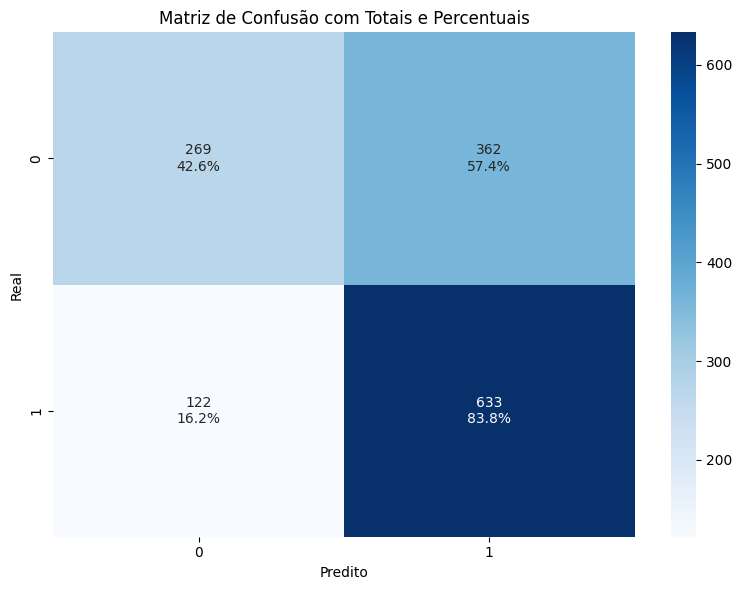

In [435]:

# Garante que ambos os arrays sejam 1D
labels = np.unique(np.concatenate([np.ravel(y_validate), np.ravel(y_pred)]))

# Matriz de confusão
cm = confusion_matrix(y_test, y_teste_pred, labels=labels)
cm_percent = cm.astype('float') / cm.sum(axis=1, keepdims=True) * 100

# DataFrames para visualização
cm_df = pd.DataFrame(cm, index=labels, columns=labels)
cm_percent_df = pd.DataFrame(cm_percent, index=labels, columns=labels)

# Anotações combinadas
annot = cm_df.astype(str) + "\n" + cm_percent_df.round(1).astype(str) + "%"

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=annot, fmt='', cmap='Blues', xticklabels=labels, yticklabels=labels)

plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão com Totais e Percentuais')
plt.tight_layout()
plt.show()


In [420]:
# Acurácia do modelo com dados não vistos / modificados.

score = accuracy_score(y_test, y_teste_pred)
score

0.6507936507936508

## Benchmark


In [330]:
# Flag para indicar se é desejável realizar os benchmark's
bench = 1

### RFE - n features

In [331]:
if (bench):
    # Split the data into training and testing sets
    # X = ace_df_encoded.drop(['Resultado Time 1','Gols 1', 'Gols 2'] + , axis=1)
    ace_df_encoded_cut = ace_df_encoded.drop(null_columns,axis = 1) #[selected_variables]

    target_var1 = ['Gols 1']
    target_var2 = ['Gols 2']
    target_var3 = ['Resultado Time 1']

    X = ace_df_encoded_cut.drop(target_var1+target_var2+target_var3, axis=1)
    y = ace_df_encoded_cut[target_var3]

    # Definir o estimador
    xgb_classifier_model = XGBClassifier(subsample=1.0, reg_lambda=0.1, reg_alpha=0, n_estimators=50, max_depth=3, learning_rate=0.45, gamma=1, colsample_bytree=0.8)


    # Criar o objeto RFE
    rfe = RFE(xgb_classifier_model, n_features_to_select=10)

    # Ajustar a RFE aos dados
    rfe.fit(X, y)

    # Obter os rankings das features
    feature_ranking = rfe.ranking_

    # Obter as features selecionadas
    selected_features = X.columns[rfe.support_]

    print(selected_features)

Index(['Chutes a gol 1', 'Chutes a gol 2', 'Escanteios 1', 'Escanteios 2',
       'Chutes fora 1', 'CartÃµes amarelos 1', 'CartÃµes vermelhos 1',
       'CartÃµes vermelhos 2', 'Laterais 1', 'Time 1'],
      dtype='object')


### RFE - Best n features

In [332]:
def downsampling(ace_df_encoded_cut):
    ace_df_encoded_cut2 = ace_df_encoded_cut.copy()
    count_per_class = ace_df_encoded_cut2.groupby('Resultado Time 1').size()

    samples_threshold = min(ace_df_encoded_cut2.groupby('Resultado Time 1').size())

    for mat, count in count_per_class.items():
        while count > samples_threshold:
            # Pega índices das linhas no grupo 'mat' até atingir o limite
            exceding_samples = ace_df_encoded_cut2[ace_df_encoded_cut2['Resultado Time 1'] == mat].sample(n=count - samples_threshold).index

            # Faça o drop das linhas excedentes
            ace_df_encoded_cut2 = ace_df_encoded_cut2.drop(exceding_samples)

            # Atualize a contagem para o grupo 'genre'
            count = len(ace_df_encoded_cut2[ace_df_encoded_cut2['Resultado Time 1'] == mat])
    return ace_df_encoded_cut2

In [333]:
print(f'Há {len(ace_df_encoded.columns) - 3} features que podem ser selecionadas.')

Há 43 features que podem ser selecionadas.


In [334]:
if (bench):
    # Split the data into training and testing sets
    # X = ace_df_encoded.drop(['Resultado Time 1','Gols 1', 'Gols 2'] + , axis=1)
    best_features_selection = [-1,0,[],[]]
    downsamp = 1
    for n_features in [i for i in range(1, 4)]:
        ace_df_encoded_cut = ace_df_encoded.drop(null_columns,axis = 1) #[selected_variables]
        
        ace_df_encoded_cut = downsampling(ace_df_encoded_cut) if downsamp else ace_df_encoded_cut

        target_var1 = ['Gols 1']
        target_var2 = ['Gols 2']
        target_var3 = ['Resultado Time 1']

        X = ace_df_encoded_cut.drop(target_var1+target_var2+target_var3, axis=1)
        y = ace_df_encoded_cut[target_var3]

        # Definir o estimador
        xgb_classifier_model = XGBClassifier(subsample=1.0, reg_lambda=0.1, reg_alpha=0, n_estimators=50, max_depth=3, learning_rate=0.45, gamma=1, colsample_bytree=0.8)

        rfe = RFE(xgb_classifier_model, n_features_to_select= n_features)

        # Ajustar a RFE aos dados
        rfe.fit(X, y)

        # Obter os rankings das features
        feature_ranking = rfe.ranking_

        # Obter as features selecionadas
        selected_features = X.columns[rfe.support_]

        ace_df_encoded_cut = ace_df_encoded.drop(null_columns,axis = 1) #[selected_variables]

        ace_df_encoded_cut = ace_df_encoded_cut[list(selected_features)  + ['Gols 1', 'Gols 2', 'Resultado Time 1']]

        ace_df_encoded_cut = downsampling(ace_df_encoded_cut) if downsamp else ace_df_encoded_cut


        X = ace_df_encoded_cut.drop(target_var1+target_var2+target_var3, axis=1)
        y = ace_df_encoded_cut[target_var3]

        # Evaluate the model using cross-validation
        scores = cross_val_score(use_model, X, y, cv=10)
        mean_accuracy = scores.mean()
        if (mean_accuracy > best_features_selection[1]):
            best_features_selection = [n_features, mean_accuracy, selected_features, feature_ranking]
        print(f" num de features : {n_features} ; Best CV Mean Accuracy: {mean_accuracy} ; selected features: {selected_features} ; ranking: {feature_ranking}")
        
            

 num de features : 1 ; Best CV Mean Accuracy: 0.6109760248118862 ; selected features: Index(['Chutes a gol 2'], dtype='object') ; ranking: [ 2  1 18 25  3  7  8 12 22 19  6 23  5  4  9 11 24 21 20 15 10 13 16 14
 17]
 num de features : 2 ; Best CV Mean Accuracy: 0.6835472956858576 ; selected features: Index(['Chutes a gol 1', 'Chutes a gol 2'], dtype='object') ; ranking: [ 1  1 12 23  2  6  7 16 24 18  5 19  4  3  8 10 21 20 17 15  9 14 11 13
 22]
 num de features : 3 ; Best CV Mean Accuracy: 0.6940479840880294 ; selected features: Index(['Chutes a gol 1', 'Chutes a gol 2', 'Escanteios 1'], dtype='object') ; ranking: [ 1  1 14 23  1  6  5 11 22 18  4 21  2  3  7  9 17 20 13 15  8 10 16 12
 19]


In [335]:
best_features_selection

[3,
 np.float64(0.6940479840880294),
 Index(['Chutes a gol 1', 'Chutes a gol 2', 'Escanteios 1'], dtype='object'),
 array([ 1,  1, 14, 23,  1,  6,  5, 11, 22, 18,  4, 21,  2,  3,  7,  9, 17,
        20, 13, 15,  8, 10, 16, 12, 19])]

### Tunning

In [336]:
models = {
    'XGBoost': {
        'model': XGBClassifier( eval_metric='logloss'),
        'params': {
            'n_estimators': [50, 100, 200, 300],
            'max_depth': [3, 5, 7, 10],
            'learning_rate': [0.001,0.01, 0.05, 0.1, 0.3],
            'subsample': [0.6, 0.8, 1.0],
            'colsample_bytree': [0.6, 0.8, 1.0],
            'gamma': [0, 0.1, 0.3, 1],
            'reg_alpha': [0, 0.01, 0.1],
            'reg_lambda': [0.1, 1, 10],
        }
    },
    # 'Extra Trees': {
    #     'model': ExtraTreesClassifier(),
    #     'params': {
    #         'n_estimators': [250, 350, 500,700],
    #         'max_depth': [None, 10, 20, 30, 60, 100],
    #         'min_samples_split': [2, 5, 10],
    #         'min_samples_leaf': [1, 2, 4, 8 , 12],
    #         'max_features': ['sqrt', 'log2', None],
    #         'bootstrap': [True, False]
    #     }
    # }
}


In [337]:
if (bench):

    target_var1 = ['Gols 1']
    target_var2 = ['Gols 2']
    target_var3 = ['Resultado Time 1']

    X = ace_df_encoded_cut.drop(target_var1+target_var2+target_var3, axis=1)
    y = ace_df_encoded_cut[target_var3]

    for name, mp in models.items():
        print(f"🔍 Treinando {name}...")
        clf = RandomizedSearchCV(
            mp['model'],
            mp['params'],
            n_iter=20,
            scoring='accuracy',
            cv=5,
            random_state=42,
            n_jobs=-1
        )
        clf.fit(X_train, y_train)
        
        best_model = clf.best_estimator_
        test_acc = cross_val_score(best_model, X, y, cv=5).mean()
        
        print(f"✅ {name} - Test Accuracy: {test_acc:.4f}")
        print(f"Best Params: {clf.best_params_}\n")


🔍 Treinando XGBoost...
✅ XGBoost - Test Accuracy: 0.6945
Best Params: {'subsample': 1.0, 'reg_lambda': 10, 'reg_alpha': 0.01, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.05, 'gamma': 0.3, 'colsample_bytree': 0.6}



In [338]:
test_acc

np.float64(0.6945132929941089)